<a href="https://colab.research.google.com/github/akshitt/Audio-Processing/blob/main/Coursera-ASP/Week_4_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short Time Fourier Transform

- <img src="https://snipboard.io/6ElFMg.jpg" width='400'>
- A time varying version of the DFT.
- Larger Window Size gives clear peaks.
- Odd size windows preferred because can be symmetric around 0. 
- Large FFT size gives smoother spectrum.
- Hop size - Window advances H samples after each DFT. about 1/4 or 1/2 of Window Size.

- Largers Windows has better frequency resolution, but poor time resolution. (Time-Frequency compromise)  
- Spectrogram:   
M ➨ Window Size   
N ➨ FFT Size
<img src='https://snipboard.io/ZqIhO2.jpg'>

***   
# Analysis Windows
- Symmetric about origin, generally real fn
- Its transform is a sinc function (sinx/x) 

## Rectangular Window 
- <img src='https://snipboard.io/fxHkOq.jpg'>
- <img src='https://snipboard.io/f8Xex9.jpg'>
- Main lobe width : 2 bins (2 samples)

## Hanning Window
- <img src='https://snipboard.io/p6rLsC.jpg'>

## Hamming Window
- <img src='https://snipboard.io/W1dzA9.jpg'>
- side-lobe level is much lower

## Blackman Window
- <img src='https://snipboard.io/WQSdrq.jpg'>

## Blackman Harris Window
- <img src='https://snipboard.io/9SPqz0.jpg'>

## Inverse STFT
<img src='https://snipboard.io/LwZ4R1.jpg'>

***




## Window

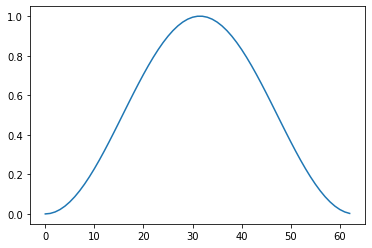

In [15]:
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import fft
import math
import matplotlib.pyplot as plt

M = 63
window = get_window('hanning', M)
M1 = int(math.floor((M+1)/2))
M2 = int(math.floor(M/2))

N = 512
hN= int(N/2)
fftbuffer = np.zeros(N)
fftbuffer[N-M2:] = window[:M2]
fftbuffer[:M1] = window[M2:]

X = fft(fftbuffer)
absX = abs(X)
absX[absX<np.finfo(float).eps] = np.finfo(float).eps #To prevent log(0) in next line 
mX = 20*np.log10(absX)
pX = np.angle(X)

mX1 = np.zeros(N)
pX1 = np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN:] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN:] = pX[:hN]

plt.plot(window)

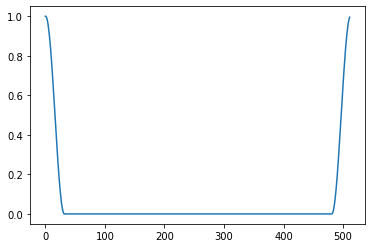

In [16]:
plt.plot(fftbuffer)

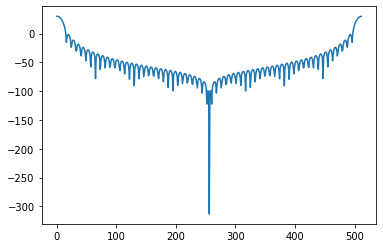

In [17]:
plt.plot(mX)

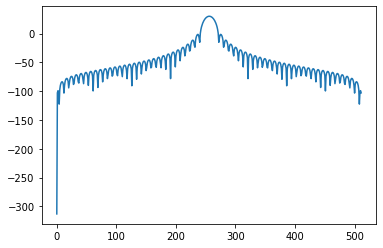

In [19]:
plt.plot(mX1)

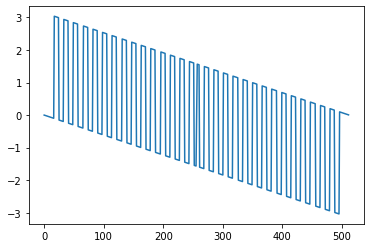

In [21]:
plt.plot(pX)